In [5]:
import os 

%matplotlib inline
import matplotlib.pyplot as plt

from desilike.samples import Profiles, Chain, plotting
from emulator_fit import get_power_likelihood, get_corr_likelihood

tracer = 'ELG'
region = 'NGC'
stat = 'power'

profiles_complete = Profiles.load('profiles_shapefit_{}_complete_{}/{}_velocileptors.npy'.format(tracer, region, stat))
#profiles = Profiles.load('profiles_shapefit_{}_{}/{}_velocileptors.npy'.format(tracer, region, stat))
profiles_fc = Profiles.load('profiles_shapefit_{}_{}/{}_velocileptors_fc.npy'.format(tracer, region, stat))

In [6]:
print(profiles_complete.to_stats(tablefmt='latex'))
#print(profiles.to_stats(tablefmt='pretty'))
print(profiles_fc.to_stats(tablefmt='latex'))

\begin{tabular}{llrl}
\hline
 chi2 = 3.70   & varied   &   bestfit & error   \\
\hline
 qpar          & True     &     0.995 & 0.014   \\
 qper          & True     &     1.005 & 0.011   \\
 dm            & True     &    -0.014 & 0.052   \\
 df            & True     &     1.034 & 0.051   \\
 b1            & True     &     0.205 & 0.040   \\
 b2            & True     &    -1.8   & 1.3     \\
 bs            & True     &     0.8   & 2.4     \\
 alpha0        & True     &     7.5   &         \\
 alpha2        & True     &     6.7   &         \\
 alpha4        & True     &    -2.9   &         \\
 sn0           & True     &  -130     &         \\
 sn2           & True     & -8500     &         \\
 sn4           & True     & 26000     &         \\
\hline
\end{tabular}
\begin{tabular}{llrl}
\hline
 chi2 = 3.75   & varied   &   bestfit & error   \\
\hline
 qpar          & True     &     0.991 & 0.019   \\
 qper          & True     &     1.008 & 0.017   \\
 dm            & True     &    -0.009 & 

In [3]:
completeness = ''
fc = '_fc'

footprint


/global/u2/m/mpinon/desi_fiber_collisions/emulator_fit.py:37: RuntimeWarning: invalid value encountered in divide
  alphas = [wsum_data / wsum_randoms / alpha for wsum_data, wsum_randoms in zip(wsums_data, wsums_randoms)]


Renormalizing randoms weights by [nan, 1.0] before concatenation.


/global/cfs/cdirs/desi/users/adematti/perlmutter/cosmodesiconda/20221205-1.0.0/conda/lib/python3.10/site-packages/numpy/lib/polynomial.py:1337: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


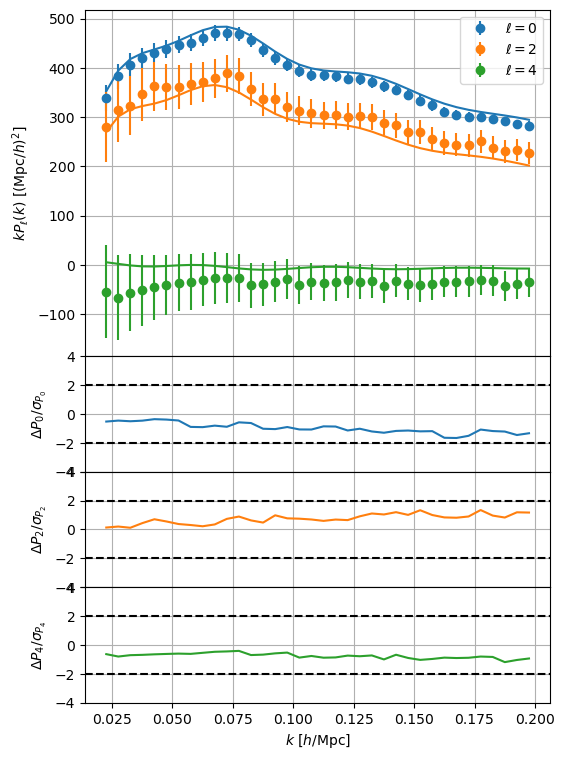

In [4]:
emulator_dir = '/global/u2/m/mpinon/desi_fiber_collisions/emulators_shapefit_{}'.format(tracer)
if stat == 'corr':
    likelihood = get_corr_likelihood(tracer=tracer, region=region, completeness=completeness, solve=False, emulator_fn=os.path.join(emulator_dir, '{}_{{}}.npy'.format(stat)))
if stat == 'power':
    likelihood = get_power_likelihood(tracer=tracer, region=region, completeness=completeness, solve=False, emulator_fn=os.path.join(emulator_dir, '{}_{{}}.npy'.format(stat)))
likelihood.solved_default = '.best'
if completeness:
    likelihood(**profiles_complete.bestfit.choice(varied=True))
else:
    if fc:
        likelihood(**profiles_fc.bestfit.choice(varied=True))
    else:
        likelihood(**profiles.bestfit.choice(varied=True))
likelihood.observables[0].plot()
plt.savefig('{}_fit_{}_{}{}{}.png'.format(stat, tracer, completeness, region, fc), dpi=200)

In [30]:
#likelihood.observables[0].plot_covariance_matrix()

In [31]:
#plotting.plot_aligned_stacked(profiles_complete)

Removed no burn in
Removed no burn in
Removed no burn in


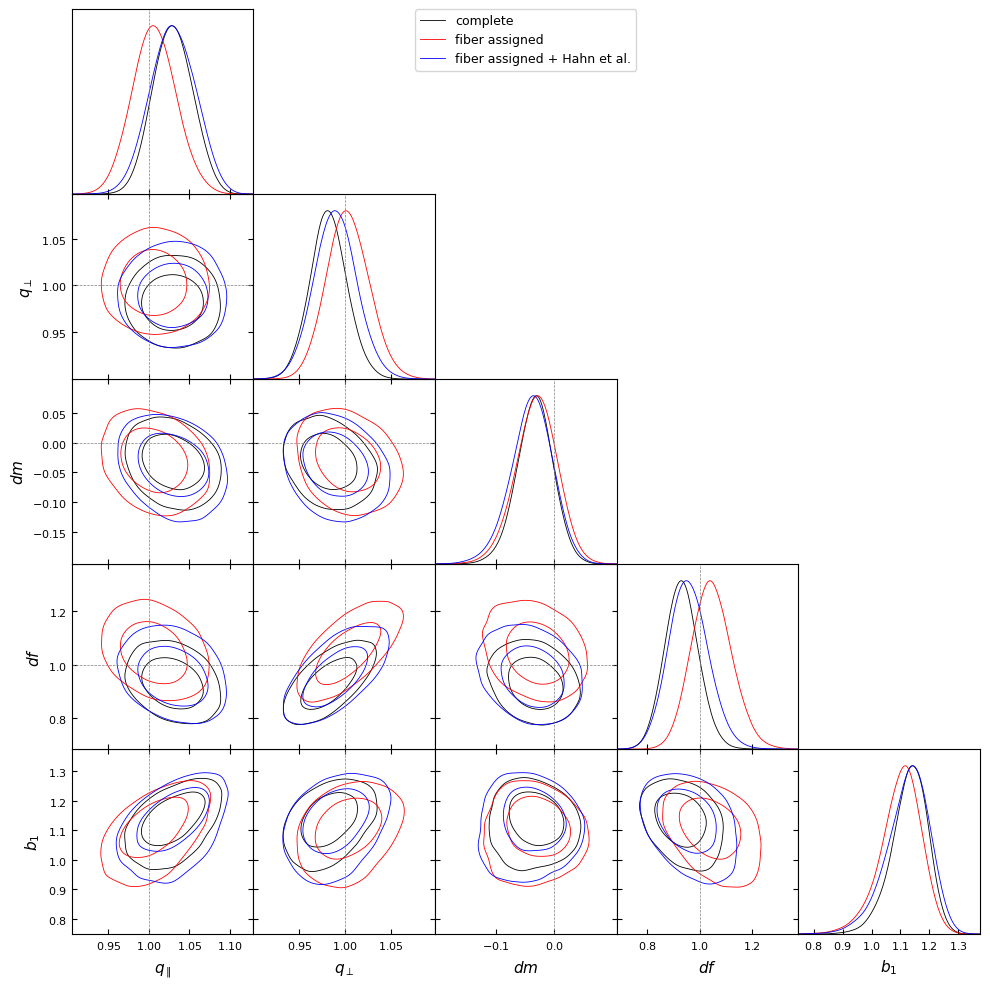

In [48]:
if stat=='power':
    chain_complete = Chain.concatenate([Chain.load('chains_shapefit_{}_complete_{}/power_velocileptors_{:d}.npy'.format(tracer, region, i)).remove_burnin(0.5)[::10] for i in range(8)])
    chain = Chain.concatenate([Chain.load('chains_shapefit_{}_{}/power_velocileptors_{:d}.npy'.format(tracer, region, i)).remove_burnin(0.5)[::10] for i in range(8)])
    chain_fc = Chain.concatenate([Chain.load('chains_shapefit_{}_{}/power_velocileptors_fc_{:d}.npy'.format(tracer, region, i)).remove_burnin(0.5)[::10] for i in range(8)])
if stat=='corr':
    chain_complete = Chain.concatenate([Chain.load('chains_shapefit_{}_complete_{}/corr_velocileptors_{:d}.npy'.format(tracer, region, i)).remove_burnin(0.5)[::200] for i in range(8)])
    chain = Chain.concatenate([Chain.load('chains_shapefit_{}_{}/corr_velocileptors_{:d}.npy'.format(tracer, region, i)).remove_burnin(0.5)[::200] for i in range(8)])
    chain_fc = Chain.concatenate([Chain.load('chains_shapefit_{}_{}/corr_velocileptors_fc_{:d}.npy'.format(tracer, region, i)).remove_burnin(0.5)[::200] for i in range(8)])
   
markers = {'qpar': 1., 'qper': 1., 'df': 1., 'dm': 0.}
plotting.plot_triangle([chain_complete, chain, chain_fc], params=['qpar', 'qper', 'df', 'dm', 'b1'], labels=['complete', 'fiber assigned', 'fiber assigned + Hahn et al.'], markers=markers, show=True, fn='corner_plot_{}_{}_{}.png'.format(tracer, region, stat))
#plotting.plot_triangle([chain_complete, chain_fc], params=['qpar', 'qper', 'df', 'dm', 'b1'], labels=['complete', 'fiber assigned + Hahn et al.'], markers=markers, show=True, fn='corner_plot_{}_{}_{}.png'.format(tracer, region, stat))
#plotting.plot_triangle([chain_complete], params=['qpar', 'qper', 'df', 'dm', 'b1'], labels=['complete'], markers=markers, show=True)

Removed no burn in
Removed no burn in


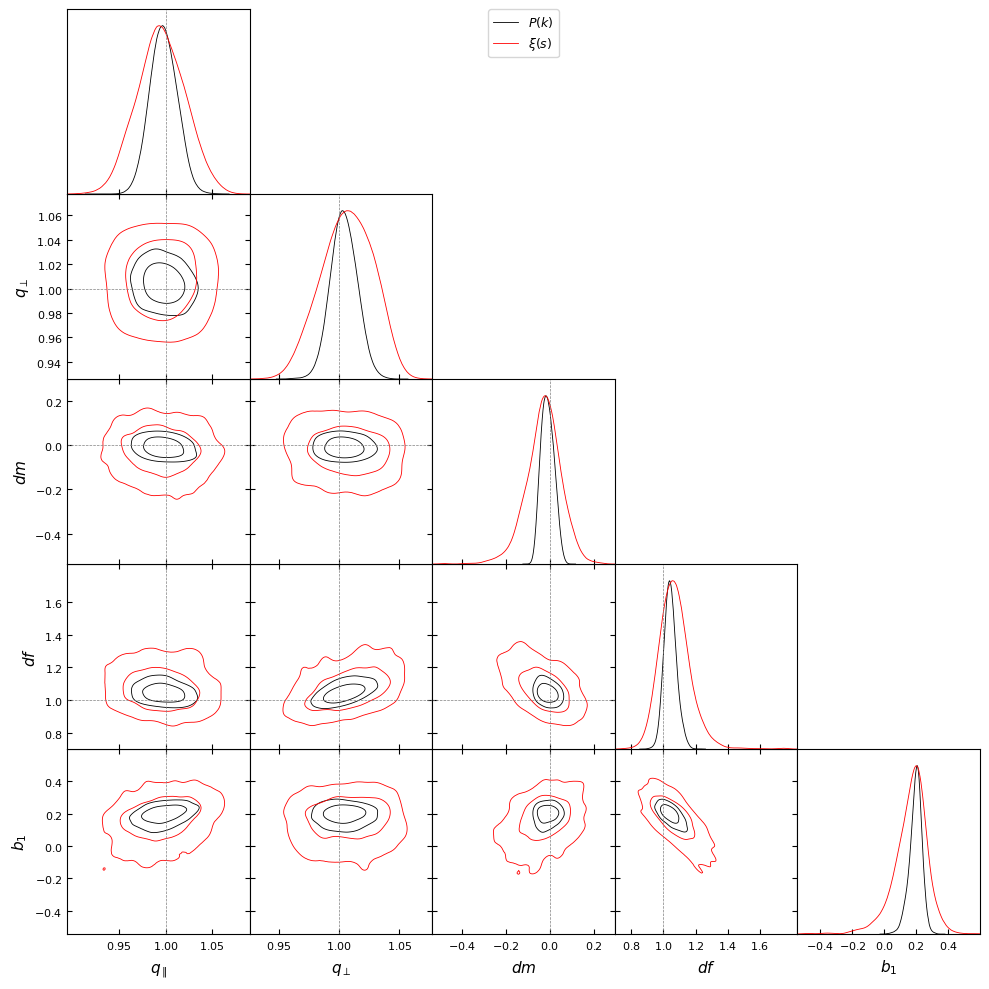

In [44]:
chain_power = Chain.concatenate([Chain.load('chains_shapefit_{}_complete_{}/power_velocileptors_{:d}.npy'.format(tracer, region, i)).remove_burnin(0.5)[::200] for i in range(8)])
chain_corr = Chain.concatenate([Chain.load('chains_shapefit_{}_complete_{}/corr_velocileptors_{:d}.npy'.format(tracer, region, i)).remove_burnin(0.5)[::200] for i in range(8)])
   
markers = {'qpar': 1., 'qper': 1., 'df': 1., 'dm': 0.}
plotting.plot_triangle([chain_power, chain_corr], params=['qpar', 'qper', 'df', 'dm', 'b1'], labels=[r'$P(k)$', r'$\xi(s)$'], markers=markers, show=True, fn='corner_plot_{}_complete_{}_power_vs_corr.png'.format(tracer, region))
